## PART D: MODEL BUILDING AND EVALUATION

It's time to build the final model to predict tourist expenditure

In [50]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [51]:
# %Loading dataset
df = pd.read_csv("../Data/Final_data.csv")
df.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_people,total_nights
0,0,0,0,1,1,0,0,0,0,0,...,0,0,13,0,0,0,0,674602.5,2,13
1,1,1,1,1,0,0,1,1,0,0,...,0,0,14,7,0,1,1,3214906.5,1,21
2,1,1,1,0,1,1,1,0,0,0,...,0,0,1,31,0,0,2,3315000.0,1,32
3,1,1,2,1,1,0,0,2,1,0,...,1,0,11,0,0,1,0,7790250.0,2,11
4,2,2,1,1,0,0,0,2,0,0,...,0,0,7,4,0,1,3,1657500.0,1,11


#### FEATURE SELECTION

In [52]:
# %spliting dependent and independent features
features_cols = df.drop(["total_cost"],1)
cols = features_cols.columns
target=df["total_cost"]

In [53]:
df[cols].shape , target.shape

((4809, 23), (4809,))

### MODELING

In [54]:
# %Let's set seed for reproducibility of our final model
SEED = 2020 #you can set any number

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df[cols],target, test_size=0.20, random_state = SEED)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3847, 23) (3847,)
(962, 23) (962,)


#### LINEAR REGRESSION

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [58]:
# %Model initialization & training
LR = LinearRegression().fit(X_train,y_train)

# %Predictions
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# % Evaluation
mae = mean_absolute_error(y_test, y_test_pred)
print('Using scikit-lean, the mae error is {}'.format(mae))

Using scikit-lean, the mae error is 5749113.958510289


In [59]:
# % Evaluation
mse = mean_squared_error(y_test, y_test_pred)
print('Using scikit-lean, the mse error is {}'.format(mse))

Using scikit-lean, the mse error is 118732536896093.83


The `Mean Absolute Error` with `Linear Regression` is very Large also `Mean Squared Error` is very Large number

#### EXTREME GRADIENT BOOST

In [60]:
from xgboost import XGBRegressor

In [61]:
# %instatiate the model
XGB = XGBRegressor()

# %training the model
XGB.fit(X_train, y_train)

# %prediction
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

# % Evaluation
mae = mean_absolute_error(y_test, y_test_pred)
print('Using scikit-lean, the mae error is {}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Using scikit-lean, the mse error is {}'.format(mse))

Using scikit-lean, the mae error is 5391249.288207617
Using scikit-lean, the mse error is 107951570443229.86


Here we can observe changes `XGBRegression` shows to perform well compared to `Linear Regression` even without passing some parameters.

Not bad for such a lazy implementation, even without data normalization After all, the data will not always be so "good". So don't forget to pre-process the data.  Now let's apply polynomial features technique on the data. And look at the result.

#### APPLYING POLYNOMIAL FEATURES

`Polynomial features` are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each.

As such, polynomial features are a type of `feature engineering`, e.g. the creation of new input features based on the existing features.

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.

***Generally speaking, it is unusual to use d greater than 3 or 4 because for large values of d, the polynomial curve can become overly flexible and can take on some very strange shapes.***

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
# % applying polynomial features with 2 degree
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(df[cols])

X_train,X_test,y_train,y_test = train_test_split(x_quad,target, random_state = 0)

In [83]:
# %instatiate the model
XGB_par_ = XGBRegressor(n_estimators= 100, colsample_bynode = 0.8, learning_rate = 0.02,max_depth =  7)

# %training the model
XGB_par_.fit(X_train, y_train)

# %prediction
y_train_pred = XGB_par_.predict(X_train)
y_test_pred = XGB_par_.predict(X_test)

# % Evaluation
mae = mean_absolute_error(y_test, y_test_pred)
print('Using scikit-lean, the mae error is {}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Using scikit-lean, the mse error is {}'.format(mse))

Using scikit-lean, the mae error is 5079126.940718205
Using scikit-lean, the mse error is 100799554074518.72


#### EXTREME GRADIENT BOOST WITH PARAMETERS

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df[cols],target, test_size=0.20, random_state = SEED)

# %instatiate the model
XGB_par = XGBRegressor( n_estimators= 100, colsample_bynode = 0.8, learning_rate = 0.02,max_depth =  7)

# %training the model
XGB_par.fit(X_train, y_train)

# %prediction
y_train_pred = XGB_par.predict(X_train)
y_test_pred = XGB_par.predict(X_test)

# % Evaluation
mae = mean_absolute_error(y_test, y_test_pred)
print('Using scikit-lean, the mae error is {}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Using scikit-lean, the mse error is {}'.format(mse))


Using scikit-lean, the mae error is 4798713.829123961
Using scikit-lean, the mse error is 97354154100030.88


Now we can see polynomial features technique does not improve the performance real well compared to Extreme gradient boost with parameter only. This shows that most of features were categorical applying polynomial feature engineering not the best approach ,may be you can try applying only to those numeric features and then concatinate with others

#### VISUALIZE PREDICTIONS

In [85]:
import matplotlib.pyplot as plt

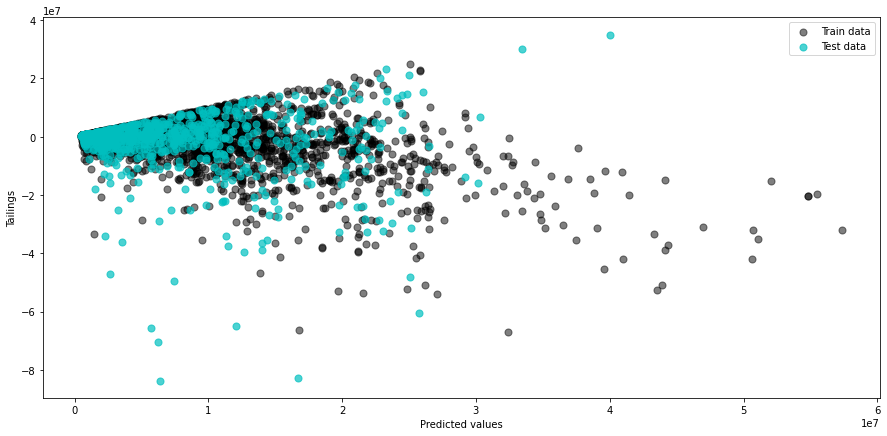

In [90]:
plt.figure(figsize=(15,7))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

Good result. But we see a noticeable retraining of the algorithm on the training data.

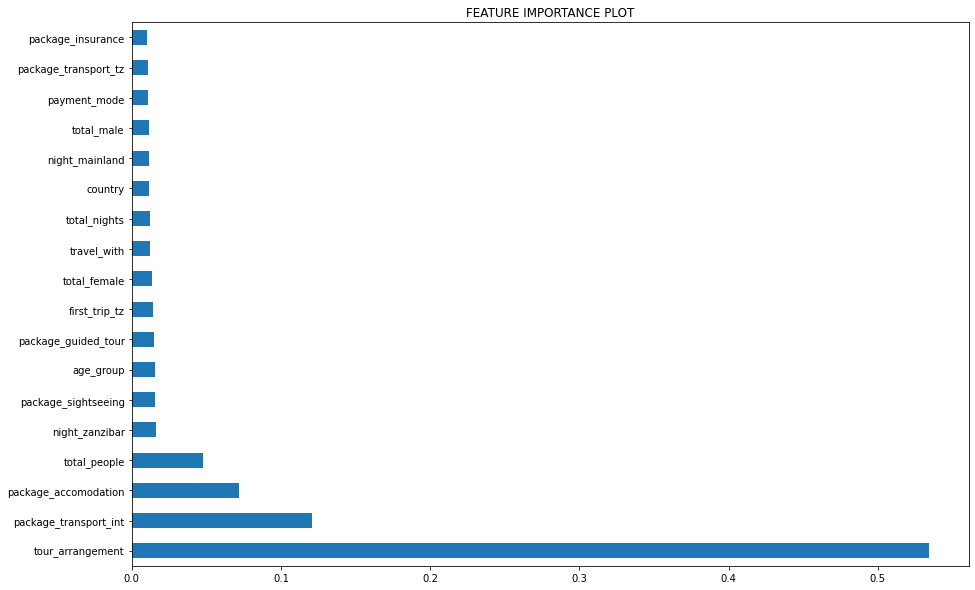

In [96]:
#Let's Visualize on the best contributed features
feat_importances = pd.Series(XGB_par.feature_importances_, index=cols)
plt.figure(figsize=(15,10))
plt.title("FEATURE IMPORTANCE PLOT")
feat_importances.nlargest(18).plot(kind='barh')
plt.show()